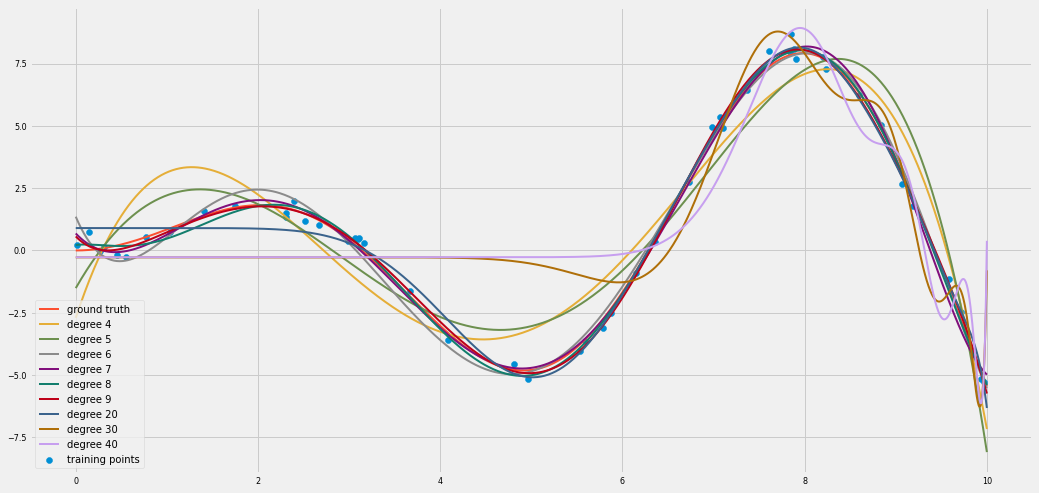

In [2]:
%matplotlib inline
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09',
         '#c79fef', '#80f9ad']

def f(x):
    return x*np.sin(x)#*np.cos(x)
    
def p(r):
    return [stats.norm.rvs(loc=f(x), scale=0.3, size=1) for x in r]

# generate points used to plot
x_plot = np.linspace(0, 10, 1000)

# generate points and keep a subset of them
x = np.linspace(0, 10, 1000)
rng = np.random.RandomState(0)
rng.shuffle(x)
n = 50
x = np.sort(x[:n])
y = p(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

fig=plt.figure(figsize=(16,8))
plt.plot(x_plot, f(x_plot), color=colors[1], label="ground truth")
plt.scatter(x, y, color=colors[0], marker='o', label="training points")
aic = []
bic = []
scores = []
degs = [4, 5, 6, 7, 8, 9, 20, 30, 40]
for count, degree in enumerate(degs):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    model1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model1.fit(X_train, y_train)
    scores.append(model1.score(X_test,y_test))
    y_hat = model.predict(X)
    resid = y - y_hat
    sse = np.sum(resid**2)
    beta = float(n)/sse
    k= degree+1
    aic.append(2*k + beta*np.log(sse)-n*np.log(beta/(2*np.pi)))
    bic.append(np.log(n)*k + beta*np.log(sse)-n*np.log(beta/(2*np.pi)))
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count+2],label="degree %d" % degree)
plt.legend(loc='lower left')

plt.show()

In [2]:
zip(degs,aic,bic,scores)

[(4, 132.10315249199837, 141.6632675191391, 0.878675442053533),
 (5, 129.48911817491512, 140.961256207484, 0.884187286417505),
 (6, 29.795591079700543, 43.17975211769756, 0.9874349427248602),
 (7, 15.958982820455889, 31.25516686388105, 0.9913352702559948),
 (8, -6.106321314697226, 11.101885734156085, 0.9952788971811907),
 (9, -4.97284284393578, 14.14738721034567, 0.9953384674174097),
 (20, 82.81144309841946, 122.96392621241053, 0.9752942416210713),
 (30, 201.33454965962818, 260.60726282790074, 0.7102229248537034),
 (40, 234.28660176931083, 312.6795449918648, -0.01859032289566742)]

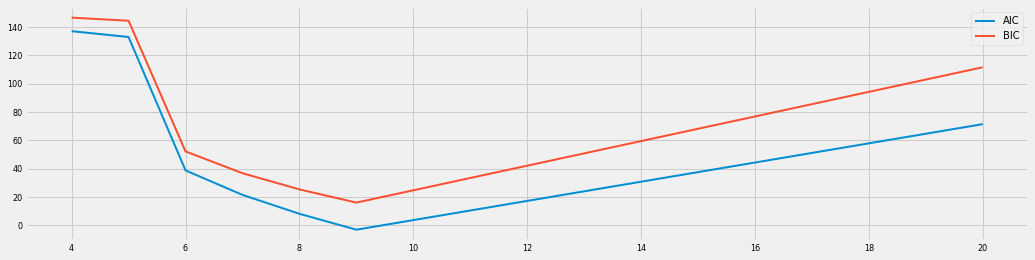

In [3]:
fig=plt.figure(figsize=(16,4))
plt.plot(degs[:-2], aic[:-2], color=colors[0], label='AIC')
plt.plot(degs[:-2], bic[:-2], color=colors[1], label='BIC')
plt.legend()

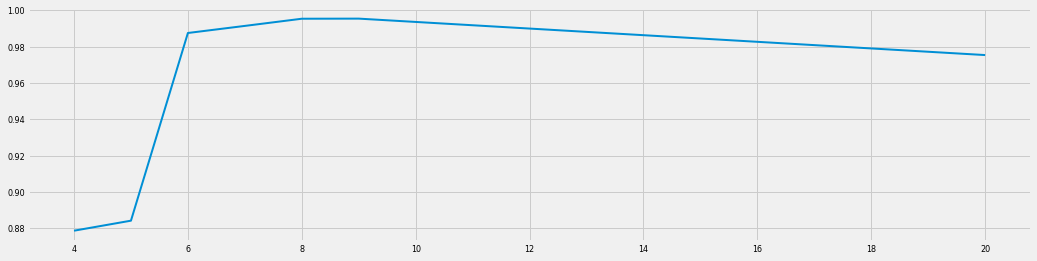

In [4]:
fig=plt.figure(figsize=(16,4))
plt.plot(degs[:-2],scores[:-2], color=colors[0])

In [5]:
degs[np.argmin(aic)], degs[np.argmin(bic)], degs[np.argmax(scores)]

(8, 8, 9)